# Este es un compilado de pasos para resolver el inciso 17 de la tarea asignada
## Arias Michel y Salazar Martinez

El ejercicio se hara en basse a un dataset de kaggle
https://www.kaggle.com/datasets/bhanupratapbiswas/olympic-data/data



A) Escoger dataset real, como se menciono se eligio un dataset de los juegos olimpicos con mas de 35 mil valores unicos para hacer el hashing, por temas de uso, solo se usaran los primeros 5000 elementos, en las instrucciones se mencionan al menos 2000, es asi que extraemos toda la informacion del CSV y solo cargamos 5000 items.

In [150]:
import csv

def ReturnNames():
    ruta_csv="./data/dataset_olympics.csv"
    nombres = []
    with open(ruta_csv, mode='r', encoding='utf-8') as archivo:
        lector_csv = csv.reader(archivo)
        for linea in lector_csv:
            if len(linea) > 1:  # Verificar que haya al menos dos elementos en la linea
                nombres.append(linea[1])  # Agregar el segundo elemento a la lista
    return nombres
Bruto=ReturnNames()
Claves=set(Bruto)
print(Claves)
print("Numero total de registros: ",len(Bruto))
print("Numero de claves unicas:",len(Claves))

#Como variable sabemos que el tamaño maximo de un encadenamiento podria ser practicamente la mitad
#Pero vamos a ir con mas posibilidades debido a la probabilidad de colisiones
TAMANO_TABLA = 50000
#Tamaño total de nuestro conjunto:
m=70001


{'Veronica Ampudia Nio de Rivera', 'Jess Dez Pinillos', 'Antoine Xavier Adams', 'Aurora Chamorro Gual', 'Gunnar Tycho Langhof Andersen', 'Jakob Caironi', 'Vagn Peter Michael Andersen', 'William Carl Buchan', 'Gunter Ambra', 'Marloes Maria Hilde Bolman', 'Catherine "Cath" Bishop', 'Paul Feierstein', 'Anthony Charles "Tony" Benson', 'Louis Fauconnier', 'Jacqueline Daz Caro', 'Salih Bora', 'Adriana Elisabeth "Jannie" de Groot', 'David Robert Chapman', 'Christine Davy (-Smith)', 'Guillermo Antonio Castro Orellana', 'Sebastio de Freitas Branco de Herdia', 'Egamnazar Akbarov', 'Nihel Cheikh Rouhou', 'Kevin Rees Barnett', 'Tord Ingemar Filipsson', 'Christoph Bieler', 'Victor Auguste de Laveleye', 'Virginie Faivre', 'Nicola Birkner', 'Tatyana Sergeyevna Chernova', 'Elio Daz', 'Valentina Aracil', 'Salah Jassim Beden', 'John Joseph Daly', 'Jzefa Chromik (Majerczyk-)', 'Samba Fall', 'Kiel Brown', 'Surita Febbraio (Loots-)', 'Robert Charles "Bob" Bryan', 'James Marvin "Jim" Barrier', 'Dede Camara'


B) Pocesar las llaves de los datasets para asignar un numero entero

Respuesta:
Vamos a convertir el STRING a un INT sumando el valor ascii de cada caracter
Claramente una concadenacion con caracteres iguales como:
Ana o anA sumaran lo mismo, pero con diferencias de puntos, espacios y mayusculas el valor entero sera diferente.


In [151]:
def stringToInt(word):
    return sum(ord(character) for character in word)
Keys=[]
for i in Bruto:
    Keys.append(stringToInt(i))
print(Keys)

[385, 791, 716, 1782, 1845, 2279, 2279, 2279, 2279, 2279, 2279, 1354, 1354, 1354, 1354, 1354, 1354, 1354, 1354, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 1117, 2944, 2944, 1467, 2663, 1672, 1580, 1666, 1666, 2650, 1911, 1911, 1911, 1911, 1911, 2326, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 2207, 1908, 1996, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 1662, 2398, 1198, 1047, 1047, 1458, 1458, 1458, 1421, 2418, 1238, 1445, 1445, 1985, 1563, 1563, 1432, 1916, 1761, 1761, 2850, 2102, 1893, 1893, 1893, 1893, 1893, 1691, 1016, 1693, 1693, 1693, 1322, 1322, 1322, 1322, 1322, 1322, 712, 1794, 2013, 1126, 1126, 1126, 1126, 1126, 1031, 928, 928, 928, 928, 928, 1883, 1883, 1883, 1883, 1509, 1127, 1127, 926, 926, 1581, 1581, 1581, 1581, 1581, 1581, 1207, 1088, 1932, 1725, 891, 891, 1776, 1547, 1547, 2110, 2110, 1645, 1551, 1638, 1689, 1219, 1656, 1416, 3612, 3612, 1440, 1440, 1518

C) Genere un histograma de la frecuencia de las nuevas llaves que se acaban de generar con la funcion previa

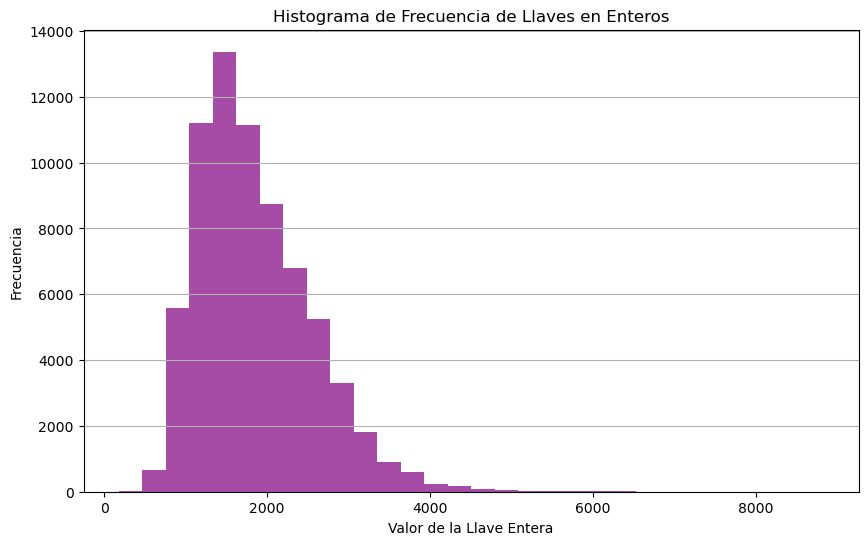

In [152]:
import matplotlib.pyplot as plt

# Genera los valores del eje X como indices del arreglo
x = range(len(Keys))  # Eje X (indices)
y = Keys               # Eje Y (valores del arreglo)

# Crear el diagrama de dispersion
plt.figure(figsize=(10, 6))
plt.hist(Keys, bins=30, color='purple', alpha=0.7)
plt.title('Histograma de Frecuencia de Llaves en Enteros')
plt.xlabel('Valor de la Llave Entera')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()


D) Construya una tabla de direccionamiento hash para el 80% del conjunto de llaves del dataset
El dataset en total tiene 70,001 llaves aunque solo 35,557 unicas, vamos por el valor mas grande
Si 70,001 es mi 100% entonces el 80% corresponde a ser 56,000

Se escogio el metodo de la multiplicacion como se ve en el siguiente bloque, teniendo a A como un numero irracional conocido como el numero aureo (mas preciso posible)
D) Vamos a comprobar el hasheo de dos valores aleatoreos de m (del 80%)

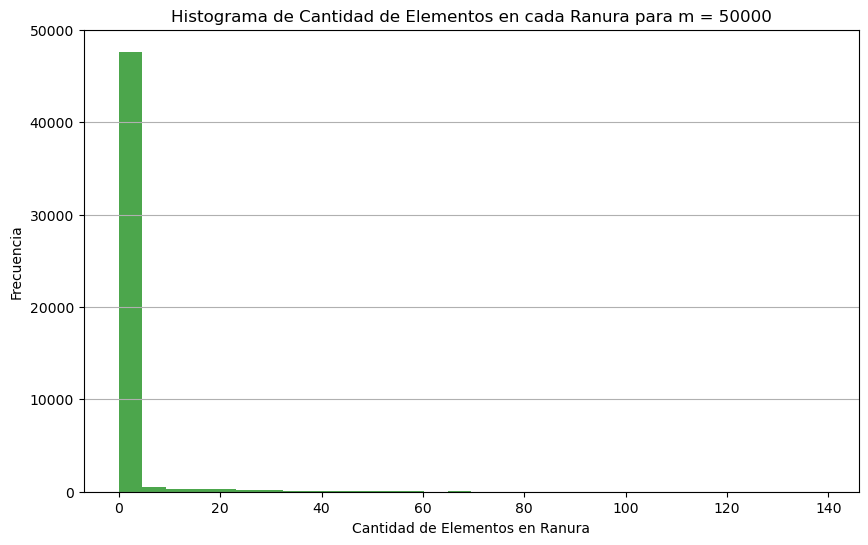

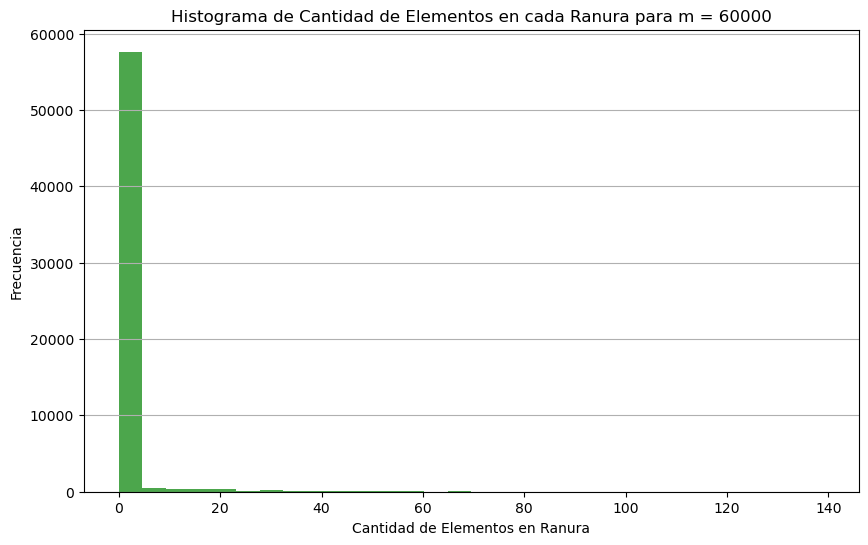

In [153]:
# Funcion para aplicar el hash con multiplicacion
def obtener_clave_multiplicacion(item, m):
    A = 0.6180339887498948
    return int(m * ((item * A) % 1))

# Funcion para construir la tabla hash y contar las ranuras ocupadas
def construir_tabla_hash(m, llaves):
    tabla_hash = [[] for _ in range(m)]
    for item in llaves:
        indice = obtener_clave_multiplicacion(item, m)
        tabla_hash[indice].append(item)
    return tabla_hash

# Probar dos valores de m
valores_m = [50000, 60000]
for m in valores_m:
    tabla_hash = construir_tabla_hash(m, Keys[:56000])
    ranuras_ocupadas = [len(ranura) for ranura in tabla_hash]
    
    # Generar histograma de la cantidad de elementos en cada ranura
    plt.figure(figsize=(10, 6))
    plt.hist(ranuras_ocupadas, bins=30, color='green', alpha=0.7)
    plt.title(f'Histograma de Cantidad de Elementos en cada Ranura para m = {m}')
    plt.xlabel('Cantidad de Elementos en Ranura')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()


E) El 20% de nuestro 80% (ahora el 100%) es el 20% de 56,000 esto es 11,200, el numero de pruebas que se hacen y el calculo del tiempo estimado   

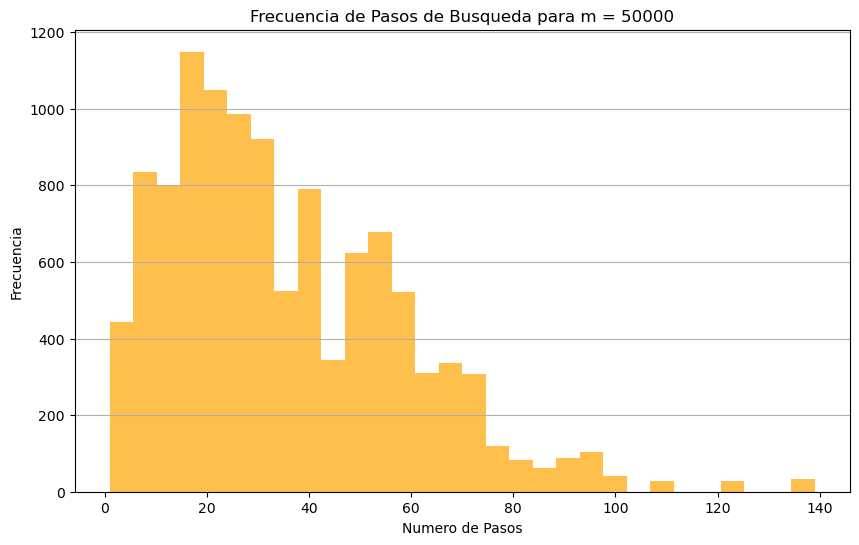

Promedio de pasos para busquedas con m = 50000: 35.31


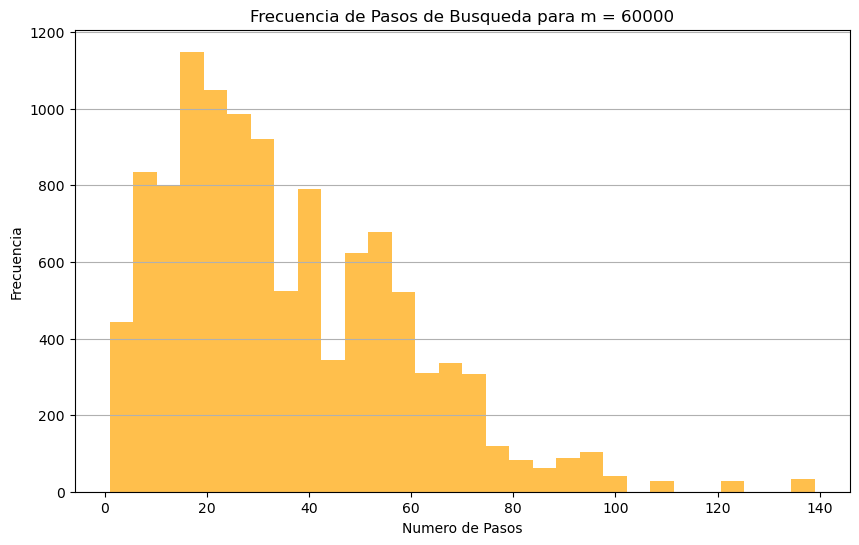

Promedio de pasos para busquedas con m = 60000: 35.31


In [154]:
import random
import time

# Seleccionar aleatoriamente un 20% de las llaves para busqueda
n_busqueda = int(0.2 * 56000)
llaves_busqueda = random.sample(Keys[:56000], n_busqueda)

# Calcular pasos promedio para cada valor de m
for m in valores_m:
    tabla_hash = construir_tabla_hash(m, Keys[:56000])
    pasos_busqueda = []

    # Realizar busqueda y registrar los pasos
    for clave in llaves_busqueda:
        indice = obtener_clave_multiplicacion(clave, m)
        pasos = len(tabla_hash[indice]) if clave in tabla_hash[indice] else 0
        pasos_busqueda.append(pasos)

    # Graficar los pasos para cada m
    plt.figure(figsize=(10, 6))
    plt.hist(pasos_busqueda, bins=30, color='orange', alpha=0.7)
    plt.title(f'Frecuencia de Pasos de Busqueda para m = {m}')
    plt.xlabel('Numero de Pasos')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

    # Imprimir el promedio de pasos
    promedio_pasos = sum(pasos_busqueda) / len(pasos_busqueda)
    print(f"Promedio de pasos para busquedas con m = {m}: {promedio_pasos:.2f}")

F) Con el 20% de las llaves no utilizadas realizar la insercion y graficar el numero de pasos para insertar, calcular el numero de pasos promedio

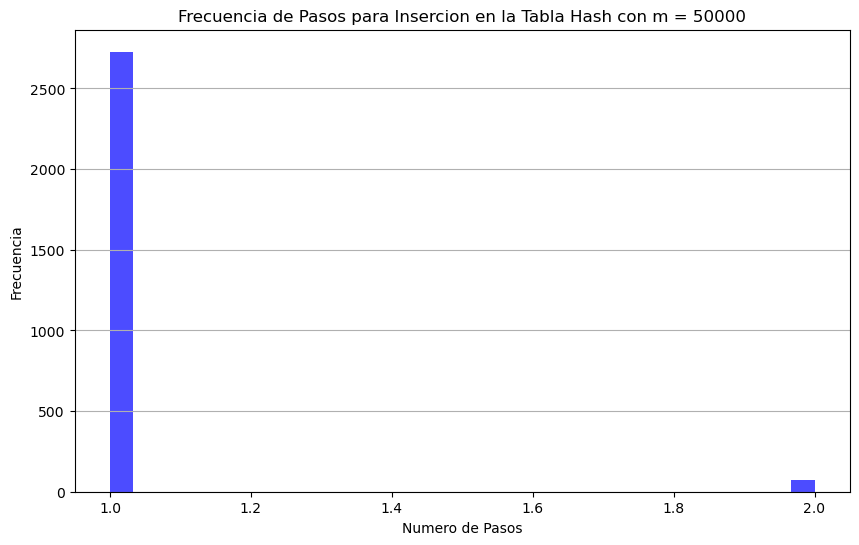

Numero promedio de pasos para insercion con m = 50000: 1.03


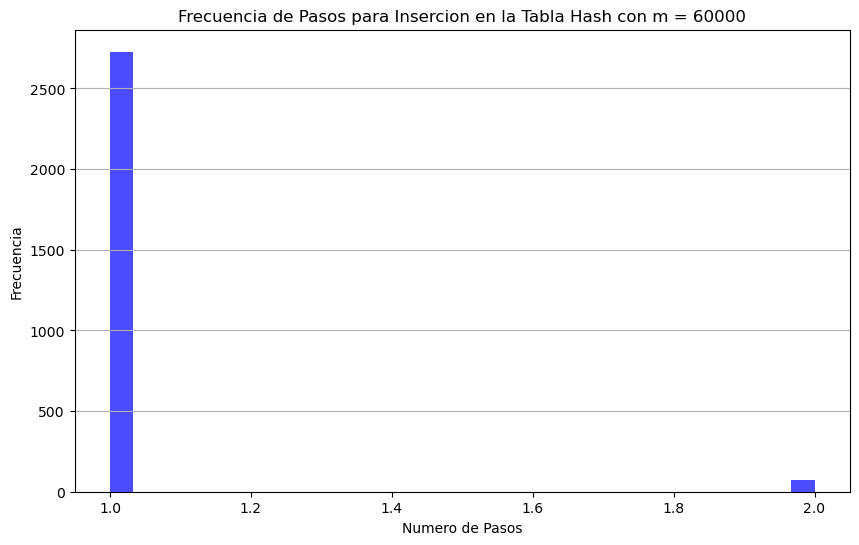

Numero promedio de pasos para insercion con m = 60000: 1.03


In [155]:
import random

# Seleccionar 20% de las llaves no utilizadas para insercion
n_insercion = int(0.2 * 14001)  # 20% de llaves restantes
llaves_insercion = random.sample(Keys[56000:], n_insercion)

# Funcion para insertar en la tabla hash y contar pasos
def insertar_en_tabla(item, tabla_hash, m):
    indice = obtener_clave_multiplicacion(item, m)
    pasos = 1  # Iniciar en 1 para contar la insercion
    if item not in tabla_hash[indice]:
        tabla_hash[indice].append(item)
        pasos += len(tabla_hash[indice])  # Numero de elementos revisados
    return pasos

# Realizar la insercion para cada valor de m y registrar pasos
for m in valores_m:
    tabla_hash = construir_tabla_hash(m, Keys[:56000])  # Reconstruir tabla inicial
    pasos_insercion = []

    for item in llaves_insercion:
        pasos = insertar_en_tabla(item, tabla_hash, m)
        pasos_insercion.append(pasos)

    # Graficar frecuencia de pasos de insercion
    plt.figure(figsize=(10, 6))
    plt.hist(pasos_insercion, bins=30, color='blue', alpha=0.7)
    plt.title(f'Frecuencia de Pasos para Insercion en la Tabla Hash con m = {m}')
    plt.xlabel('Numero de Pasos')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

    # Calcular el promedio de pasos de insercion
    promedio_pasos_insercion = sum(pasos_insercion) / len(pasos_insercion)
    print(f"Numero promedio de pasos para insercion con m = {m}: {promedio_pasos_insercion:.2f}")



G) Con el 10% no utilizados recrear F y evaluar las operaciones de supresion con graficas

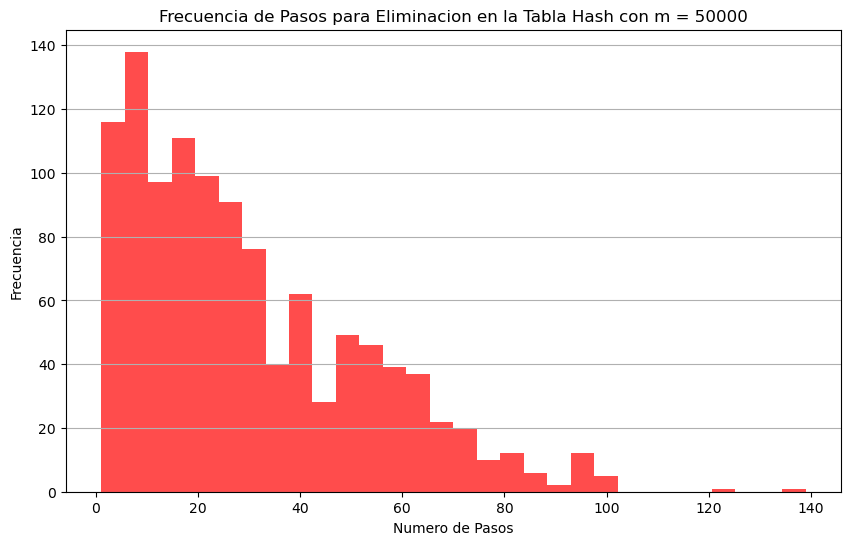

Numero promedio de pasos para eliminacion con m = 50000: 29.63


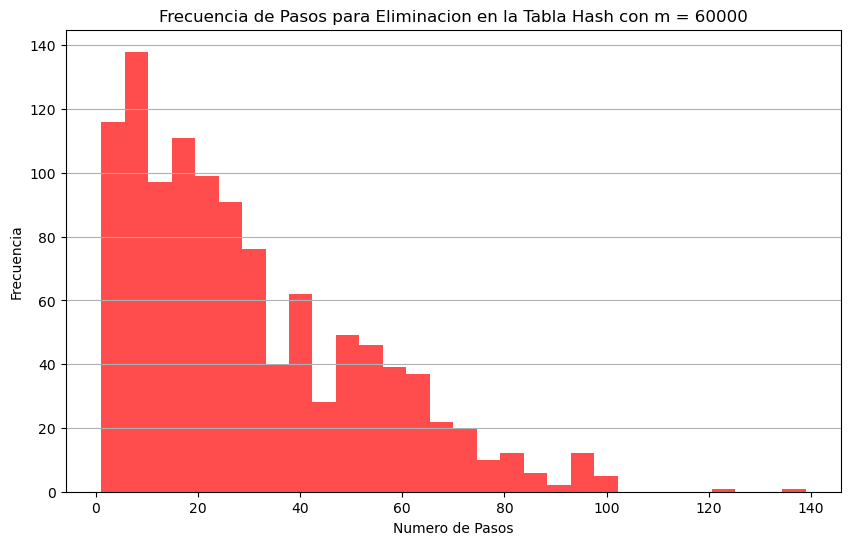

Numero promedio de pasos para eliminacion con m = 60000: 29.63


In [156]:
# Seleccionar 10% de las llaves no utilizadas para eliminacion
n_eliminar = int(0.1 * (14001 - n_insercion))  # 10% de llaves restantes despues de insercion
llaves_eliminar = random.sample(Keys[56000 + n_insercion:], n_eliminar)

# Funcion para eliminar en la tabla hash y contar pasos
def eliminar_en_tabla(item, tabla_hash, m):
    indice = obtener_clave_multiplicacion(item, m)
    pasos = 1  # Iniciar en 1 para contar la supresion
    if item in tabla_hash[indice]:
        tabla_hash[indice].remove(item)
        pasos += len(tabla_hash[indice])  # Numero de elementos revisados
    return pasos

# Realizar la eliminacion para cada valor de m y registrar pasos
for m in valores_m:
    tabla_hash = construir_tabla_hash(m, Keys[:56000])  # Reconstruir tabla inicial
    for item in llaves_insercion:  # Reinsertar el 20% de llaves usadas para insercion
        insertar_en_tabla(item, tabla_hash, m)
    
    pasos_eliminacion = []
    for item in llaves_eliminar:
        pasos = eliminar_en_tabla(item, tabla_hash, m)
        pasos_eliminacion.append(pasos)

    # Graficar frecuencia de pasos de eliminacion
    plt.figure(figsize=(10, 6))
    plt.hist(pasos_eliminacion, bins=30, color='red', alpha=0.7)
    plt.title(f'Frecuencia de Pasos para Eliminacion en la Tabla Hash con m = {m}')
    plt.xlabel('Numero de Pasos')
    plt.ylabel('Frecuencia')
    plt.grid(axis='y')
    plt.show()

    # Calcular el promedio de pasos de eliminacion
    promedio_pasos_eliminacion = sum(pasos_eliminacion) / len(pasos_eliminacion)
    print(f"Numero promedio de pasos para eliminacion con m = {m}: {promedio_pasos_eliminacion:.2f}")
